In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.impute import KNNImputer

In [ ]:
# Loading train and test Datasets, air_system_previous_years for training and air_system_present_year for test
treino = pd.read_csv('air_system_previous_years.csv')
teste = pd.read_csv('air_system_present_year.csv')

In [ ]:
# Replasing na values with predicted possible values
# using KNN and saving the resulting dataframe as it's own csv for ease of access

imputer = KNNImputer(n_neighbors=5)
teste.replace('na', np.nan, inplace=True)
teste['class'].replace({'neg': 0, 'pos': 1}, inplace=True)
teste = pd.DataFrame(imputer.fit_transform(teste), columns=teste.columns)
teste.to_csv('teste.csv', index=False)


In [ ]:
# Replasing na values with predicted possible values
# using KNN and saving the resulting dataframe as it's own csv for ease of access

imputer = KNNImputer(n_neighbors=5)
treino.replace('na', np.nan, inplace=True)
treino['class'].replace({'neg': 0, 'pos': 1}, inplace=True)
treino = pd.DataFrame(imputer.fit_transform(treino), columns=treino.columns)
treino.to_csv('treino.csv', index=False)

In [ ]:
#Loading pre-treated dataframes

treino = pd.read_csv('treino.csv')
teste = pd.read_csv('teste.csv')

In [ ]:
treino['class'].replace({0:'neg', 1:'pos'}, inplace=True)
teste['class'].replace({0:'neg', 1:'pos'}, inplace=True)

In [ ]:
try:
  teste.drop('predicted_class', axis=1, inplace=True)
except:
  pass

In [ ]:
# Separating features (X) and targets (Y) for training
X_train = treino.drop('class', axis=1)
y_train = treino['class']

# Training the model
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

# Making predictions with probability for later use
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(teste.drop('class', axis=1))[:, 1]

# Adjusting decision threshold
threshold = 0.5
y_train_pred_num = (y_train_proba >= threshold).astype(int)
y_test_pred_num = (y_test_proba >= threshold).astype(int)

# Mapping numeric predictions for labeling
label_mapping = {0: 'neg', 1: 'pos'}
y_train_pred = pd.Series(y_train_pred_num).map(label_mapping)
y_test_pred = pd.Series(y_test_pred_num).map(label_mapping)

# Calculating accuracy and recall
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(teste['class'], y_test_pred)
train_recall = recall_score(y_train, y_train_pred, pos_label='pos')
test_recall = recall_score(teste['class'], y_test_pred, pos_label='pos')

print(f"Accuracy in the training data: {train_accuracy:.4f}")
print(f"Recall in the training data: {train_recall:.4f}")
print(f"Accuracy in the testing data: {test_accuracy:.4f}")
print(f"Recall in the testing data: {test_recall:.4f}")

# Creating a Confusion Matrix for Analysis
conf_matrix = confusion_matrix(teste['class'], y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Detailed Classification Report
class_report = classification_report(teste['class'], y_test_pred)
print("Classification Report:")
print(class_report)

# Add predicted classes to the dataframe
teste['predicted_class'] = y_test_pred
teste.to_csv('teste.csv', index=False)

# Saving results on a new CSV file
output_file_path = '/content/resultados.csv'
teste.to_csv(output_file_path, index=False)

print(f"Predictions saved at: {output_file_path}")

# Identify columns with highest probability of containing "pos"
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})

# Classify freatyres by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

print("columns with highest probability of containing 'pos':")
print(importance_df.head())
important_features = importance_df['feature'].tolist()
print("\nList of columns ordererd by probability of containing 'pos':")
print(important_features)


Accuracy in the training data: 1.0000
Recall in the training data: 1.0000
Accuracy in the testing data: 0.9922
Recall in the testing data: 0.7067
Confusion Matrix:
[[15610    15]
 [  110   265]]
Classification Report:
              precision    recall  f1-score   support

         neg       0.99      1.00      1.00     15625
         pos       0.95      0.71      0.81       375

    accuracy                           0.99     16000
   macro avg       0.97      0.85      0.90     16000
weighted avg       0.99      0.99      0.99     16000

Predictions saved at: /content/resultados.csv
columns with highest probability of containing 'pos':
   feature  importance
70  bj_000    0.036238
8   ag_002    0.031281
25  aq_000    0.028446
21    am_0    0.027908
24  ap_000    0.024835

List of columns ordererd by probability of containing 'pos':
['bj_000', 'ag_002', 'aq_000', 'am_0', 'ap_000', 'ck_000', 'ag_001', 'ee_005', 'bu_000', 'ag_003', 'ci_000', 'al_000', 'cn_000', 'aa_000', 'cq_000', 'bv_00

In [ ]:

# Select the top N most relevant columns for the graphic
top_n = 20
top_features = importance_df.head(top_n)

In [ ]:
index_list = top_features.index.values.tolist()
for i in index_list:
  feature_name = top_features.feature[i]
  graph_df = pd.DataFrame({'values': teste[feature_name], 'prediction': teste['predicted_class']})

In [ ]:

graph_df.replace({ 'NaN': 0}, inplace=True)
min = graph_df['values'].astype(float)

0          3458.0
1          3134.0
2        265492.0
3        316130.0
4          4966.0
           ...   
15995    493980.0
15996      4264.0
15997    419172.0
15998     14332.0
15999       960.0
Name: values, Length: 16000, dtype: float64
           values  prediction
42     64370192.0           1
366     7477930.0           0
416    13600916.0           0
426     7734920.0           0
434    13200986.0           1
...           ...         ...
15714   9186116.0           0
15751  15663364.0           0
15783   7091536.0           1
15880  25310844.0           0
15955  12741734.0           1

[277 rows x 2 columns]
[42, 366, 416, 426, 434, 443, 465, 486, 487, 583, 612, 697, 798, 890, 908, 928, 950, 958, 970, 1128, 1133, 1161, 1227, 1277, 1338, 1393, 1427, 1429, 1488, 1517, 1537, 1577, 1582, 1592, 1613, 1691, 1704, 1796, 1829, 1881, 1888, 1944, 2027, 2151, 2174, 2188, 2284, 2287, 2341, 2473, 2530, 2531, 2773, 2778, 2800, 2843, 2936, 2942, 3193, 3227, 3264, 3294, 3309, 3422, 3497, 353

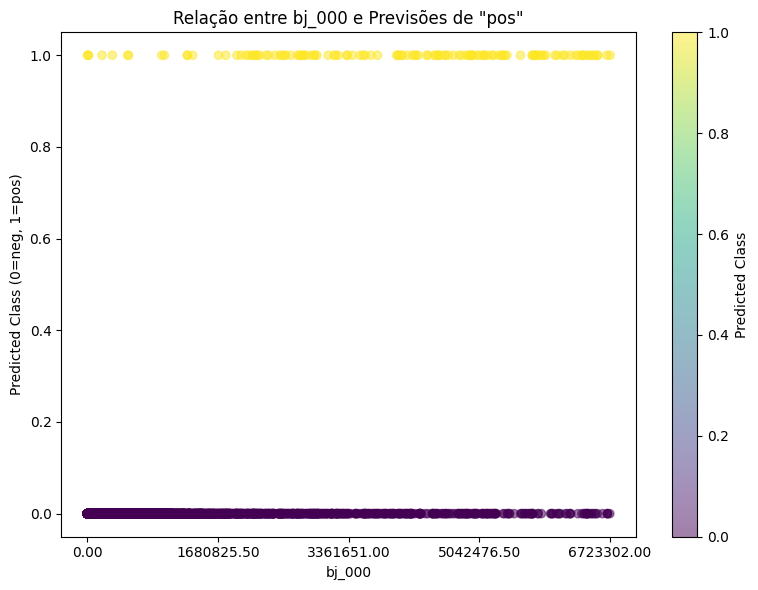

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15995    0.0
15996    0.0
15997    0.0
15998    0.0
15999    0.0
Name: values, Length: 16000, dtype: float64
          values  prediction
728    1064490.0           1
798    1059660.0           1
834    1579354.0           1
883    1182356.0           0
890    1391038.0           1
...          ...         ...
14204   919544.0           1
14425  2117554.0           1
14906   747532.0           1
15298   926888.0           1
15416  5767806.0           1

[76 rows x 2 columns]
[728, 798, 834, 883, 890, 1161, 1277, 1488, 1566, 1973, 2284, 2528, 2774, 2799, 2800, 3225, 3309, 3336, 3547, 3685, 3846, 3988, 4009, 4220, 4405, 5069, 5158, 5212, 5448, 5633, 5886, 6258, 6511, 7223, 7252, 7498, 7655, 8039, 8166, 8499, 8750, 9196, 9322, 9372, 9396, 9581, 9594, 9621, 9648, 9940, 10057, 10316, 10641, 10681, 10781, 10840, 10937, 11021, 11294, 11519, 11532, 11538, 11989, 12134, 12344, 12470, 12964, 12990, 13664, 13851, 13897,

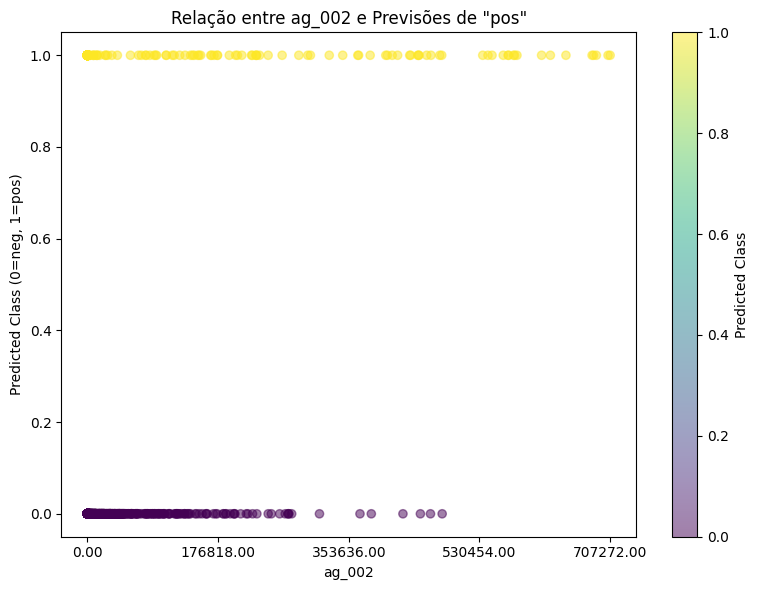

0           470.0
1          1270.0
2        286536.0
3        423374.0
4          5092.0
           ...   
15995    669608.0
15996      1338.0
15997    578006.0
15998      6160.0
15999        96.0
Name: values, Length: 16000, dtype: float64
           values  prediction
42     34558772.0           1
105     5249368.0           0
106     4732768.0           0
345     6074428.0           0
366     4996130.0           0
...           ...         ...
15799   5478870.0           1
15880  16531480.0           0
15886   6590296.0           0
15955  13571100.0           1
15977   5048126.0           0

[323 rows x 2 columns]
[42, 105, 106, 345, 366, 416, 426, 434, 443, 465, 486, 487, 536, 612, 696, 697, 745, 833, 853, 890, 908, 928, 950, 958, 970, 1036, 1128, 1133, 1161, 1227, 1277, 1338, 1393, 1429, 1517, 1537, 1548, 1577, 1582, 1592, 1613, 1691, 1755, 1774, 1829, 1888, 1944, 1982, 2101, 2151, 2188, 2284, 2341, 2473, 2530, 2531, 2773, 2778, 2843, 2936, 2942, 3193, 3217, 3227, 3264, 3267, 329

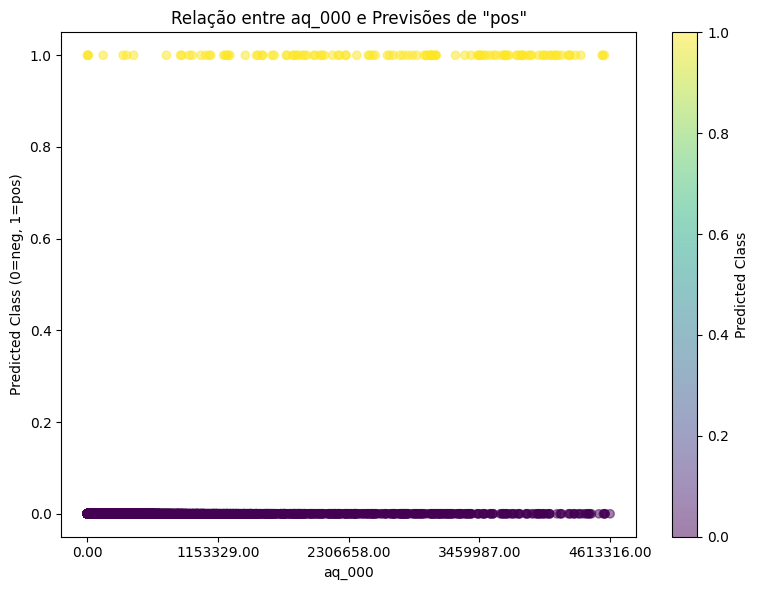

0          2374.0
1             0.0
2        110548.0
3          2372.0
4             0.0
           ...   
15995         0.0
15996      2790.0
15997         0.0
15998         0.0
15999         0.0
Name: values, Length: 16000, dtype: float64
           values  prediction
443    10403848.0           1
486     6802408.0           1
728     3459224.0           1
798    20301082.0           1
890     9589778.0           1
...           ...         ...
14594   4084138.0           1
14995   5159618.0           1
15298   4286768.0           1
15416  17449376.0           1
15783   4550980.0           1

[132 rows x 2 columns]
[443, 486, 728, 798, 890, 1161, 1338, 1468, 1488, 1566, 1577, 1613, 1796, 1881, 2174, 2284, 2528, 2531, 2774, 2778, 2800, 2843, 2930, 2946, 3248, 3294, 3309, 3497, 3534, 3547, 3581, 3742, 3762, 3846, 3988, 3995, 4405, 4466, 4654, 4682, 4694, 4935, 5069, 5101, 5172, 5286, 5417, 5448, 5491, 5588, 5886, 5977, 6010, 6130, 6134, 6139, 6161, 6258, 6319, 6457, 6511, 6738, 6813, 

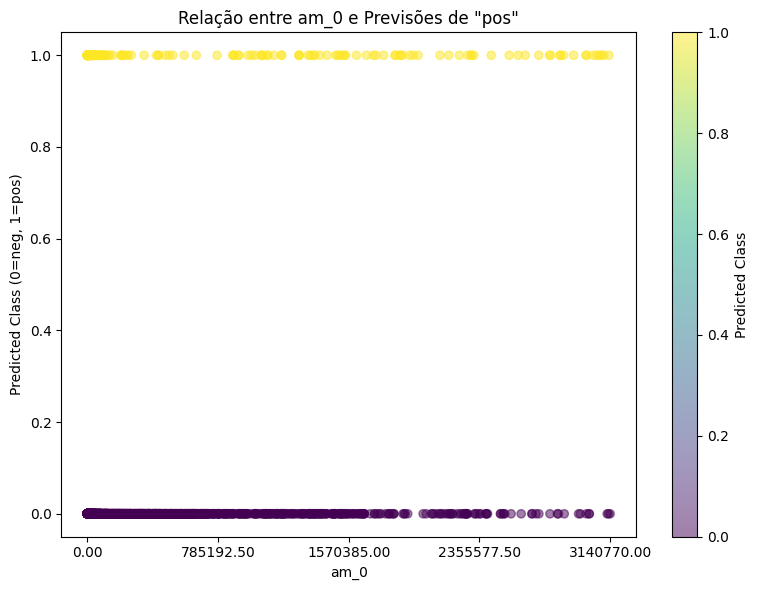

0         111258.0
1          23686.0
2         959756.0
3         652616.0
4          12932.0
           ...    
15995     973592.0
15996       7222.0
15997    1238380.0
15998      61018.0
15999       5404.0
Name: values, Length: 16000, dtype: float64
           values  prediction
42     84129814.0           1
105    12074690.0           0
106    12847386.0           0
366    12045208.0           0
416    19451824.0           0
...           ...         ...
15751  22339468.0           0
15880  35143548.0           0
15886  22682388.0           0
15955  23791478.0           1
15977  13582924.0           0

[330 rows x 2 columns]
[42, 105, 106, 366, 416, 426, 434, 443, 465, 486, 487, 499, 612, 697, 798, 833, 853, 890, 908, 928, 950, 970, 1128, 1133, 1161, 1227, 1277, 1338, 1393, 1403, 1429, 1488, 1517, 1537, 1566, 1577, 1582, 1592, 1613, 1691, 1704, 1755, 1829, 1881, 1888, 1944, 2027, 2101, 2102, 2151, 2174, 2188, 2284, 2341, 2473, 2530, 2531, 2615, 2773, 2778, 2800, 2843, 2930, 2936, 2

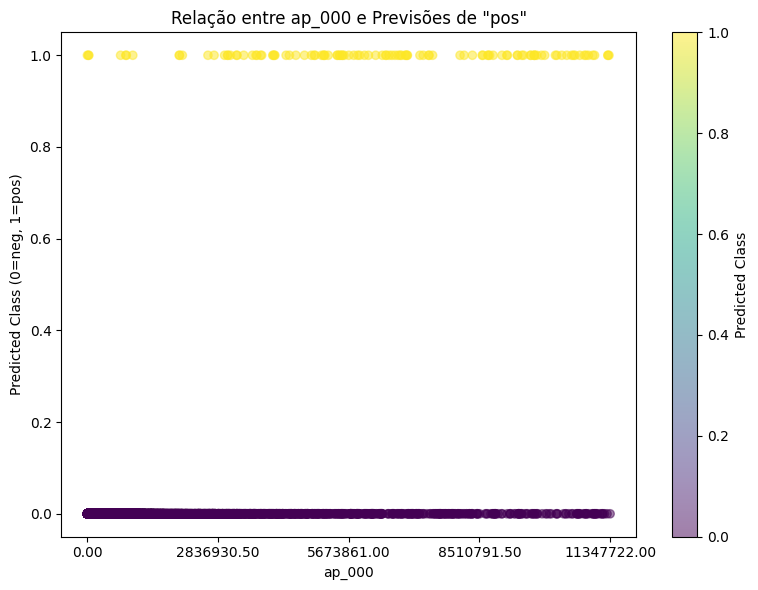

0          5851.20
1          7768.32
2        374649.60
3        599624.64
4          9556.80
           ...    
15995    847887.36
15996      8124.48
15997    417673.92
15998     20952.00
15999      3484.80
Name: values, Length: 16000, dtype: float64
            values  prediction
42     18403598.40           1
106     8627747.52           0
366    15932529.60           0
416    17379827.52           0
426     8332377.60           0
...            ...         ...
15687  10227149.76           0
15714  12932784.00           0
15751  12648272.64           0
15880  21183075.84           0
15955   9148662.72           1

[321 rows x 2 columns]
[42, 106, 366, 416, 426, 434, 443, 465, 486, 487, 697, 745, 798, 890, 908, 928, 950, 970, 1133, 1161, 1277, 1279, 1304, 1338, 1393, 1400, 1403, 1427, 1429, 1488, 1517, 1548, 1566, 1577, 1582, 1592, 1613, 1691, 1704, 1740, 1774, 1829, 1851, 1881, 1888, 1912, 1944, 1972, 1973, 1982, 2027, 2151, 2174, 2188, 2284, 2473, 2531, 2576, 2615, 2773, 2778, 284

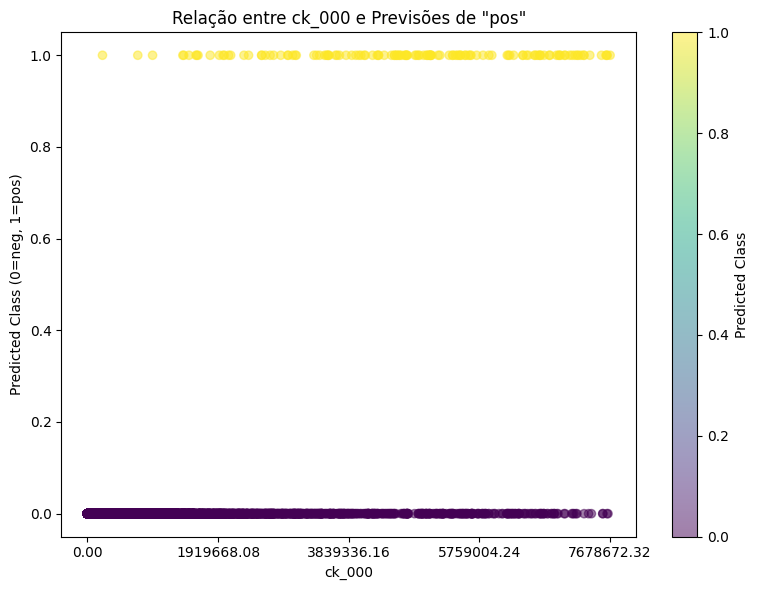

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15995    0.0
15996    0.0
15997    0.0
15998    0.0
15999    0.0
Name: values, Length: 16000, dtype: float64
           values  prediction
1161    1305080.0           1
1973     585036.0           1
2528     509690.0           1
2799     402040.0           0
3309     403436.0           1
3336     300930.0           1
3846     447178.0           1
5886     281128.0           1
7223     483424.0           1
7252     281128.0           1
8166     467770.0           1
8750   10472522.0           1
9196     305360.0           1
9322     833844.0           1
9581     719828.0           1
9621     397406.0           1
10316    360798.0           1
10681   2186872.0           1
10840    276252.0           1
11294   1037024.0           1
11538    731826.0           1
11989   1214434.0           1
12470    364420.0           1
13664    273490.0           1
13897    387764.0           1
15416   1479684.0           1
[11

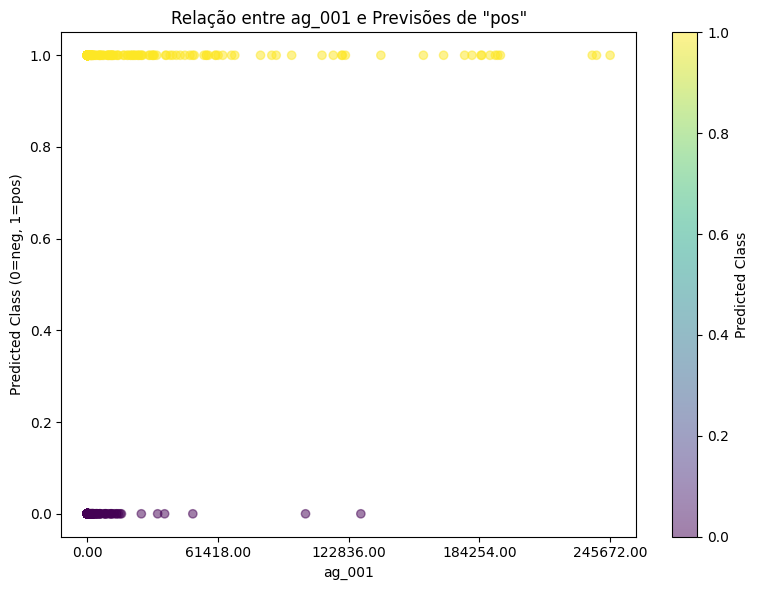

0           654.0
1           116.0
2        269556.0
3        485332.0
4         49782.0
           ...   
15995    373918.0
15996        14.0
15997    581558.0
15998       544.0
15999        14.0
Name: values, Length: 16000, dtype: float64
           values  prediction
42      7087194.0           1
345     6860594.0           0
426     8521170.0           0
434    12907126.0           1
487     9858088.0           0
...           ...         ...
15416   5798268.0           1
15464   4340084.0           0
15711   8653638.0           1
15799   6221124.0           1
15955   8797016.0           1

[226 rows x 2 columns]
[42, 345, 426, 434, 487, 499, 627, 697, 786, 833, 834, 853, 890, 908, 928, 950, 970, 1036, 1161, 1223, 1227, 1257, 1277, 1348, 1393, 1429, 1488, 1566, 1582, 1592, 1613, 1829, 1881, 1888, 1972, 2147, 2188, 2260, 2284, 2310, 2341, 2473, 2482, 2528, 2530, 2531, 2773, 2774, 2800, 2936, 3010, 3040, 3217, 3225, 3262, 3287, 3294, 3309, 3336, 3363, 3422, 3482, 3497, 3513, 3581, 3

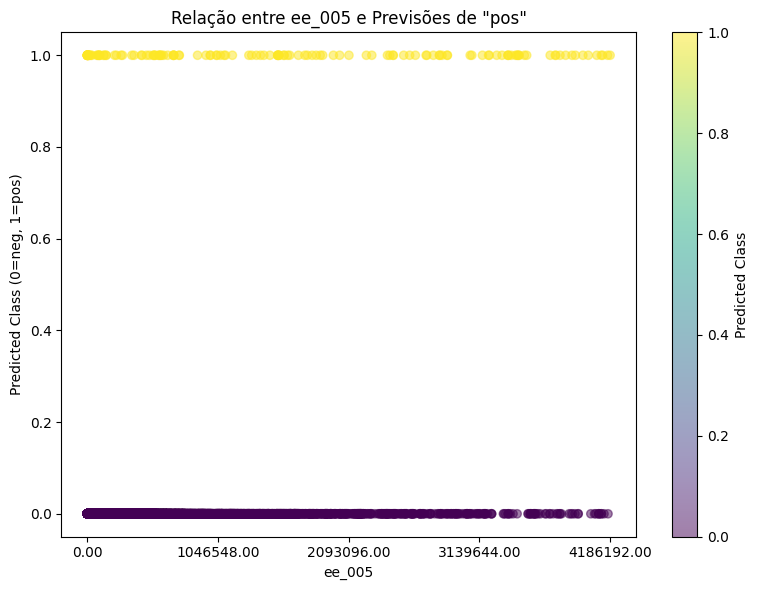

0         124340.0
1          46894.0
2        4644422.0
3        4201350.0
4         110094.0
           ...    
15995    5522314.0
15996      23062.0
15997    5802262.0
15998      87120.0
15999      17070.0
Name: values, Length: 16000, dtype: float64
            values  prediction
42     234981844.0           1
287     45910132.0           0
345     55477046.0           0
372     40741264.0           0
416     59582894.0           0
...            ...         ...
15799   49337574.0           1
15880  114928062.0           0
15886   69935854.0           0
15955   81120624.0           1
15977   62134042.0           0

[404 rows x 2 columns]
[42, 287, 345, 372, 416, 426, 434, 443, 465, 486, 487, 499, 612, 697, 786, 798, 833, 853, 890, 908, 928, 950, 970, 1036, 1128, 1133, 1161, 1227, 1257, 1277, 1292, 1304, 1338, 1393, 1403, 1429, 1488, 1517, 1537, 1548, 1566, 1577, 1582, 1592, 1613, 1691, 1704, 1774, 1784, 1829, 1888, 1944, 1982, 2027, 2102, 2151, 2174, 2188, 2284, 2310, 2341, 2473, 25

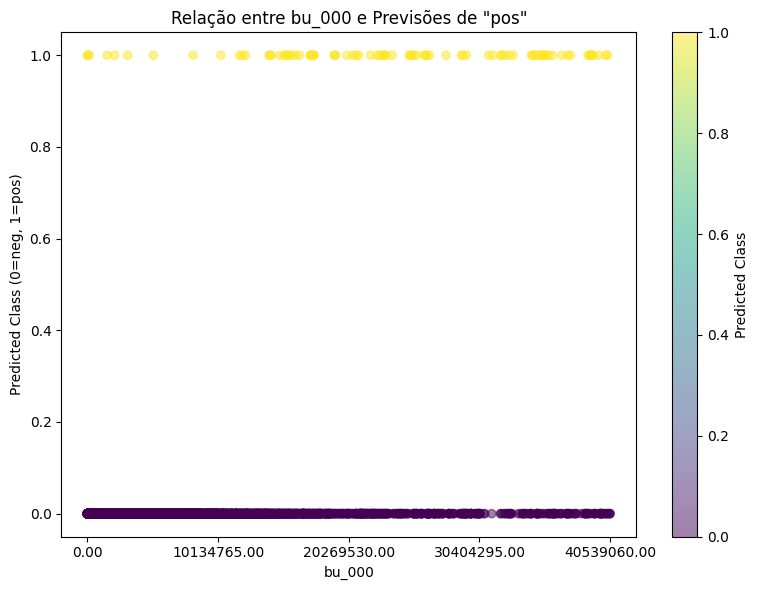

0          2682.0
1             0.0
2        199486.0
3             0.0
4             0.0
           ...   
15995         0.0
15996         0.0
15997         0.0
15998         0.0
15999         0.0
Name: values, Length: 16000, dtype: float64
           values  prediction
42      7875494.0           1
443     4419302.0           1
583     3699216.0           1
728     6405012.0           1
798     8415344.0           1
...           ...         ...
14967   3398268.0           0
15195   3439760.0           1
15298   9374246.0           1
15416  16389600.0           1
15621   3968486.0           0

[147 rows x 2 columns]
[42, 443, 583, 728, 798, 834, 890, 958, 1161, 1227, 1277, 1326, 1338, 1468, 1488, 1566, 1613, 1796, 1851, 1881, 1972, 1973, 2071, 2174, 2284, 2287, 2310, 2528, 2531, 2774, 2778, 2800, 2942, 2946, 3076, 3225, 3264, 3294, 3309, 3336, 3497, 3513, 3547, 3581, 3685, 3762, 3846, 3988, 4009, 4108, 4220, 4268, 4367, 4405, 4412, 4682, 4859, 4933, 5069, 5158, 5172, 5212, 5417, 5448

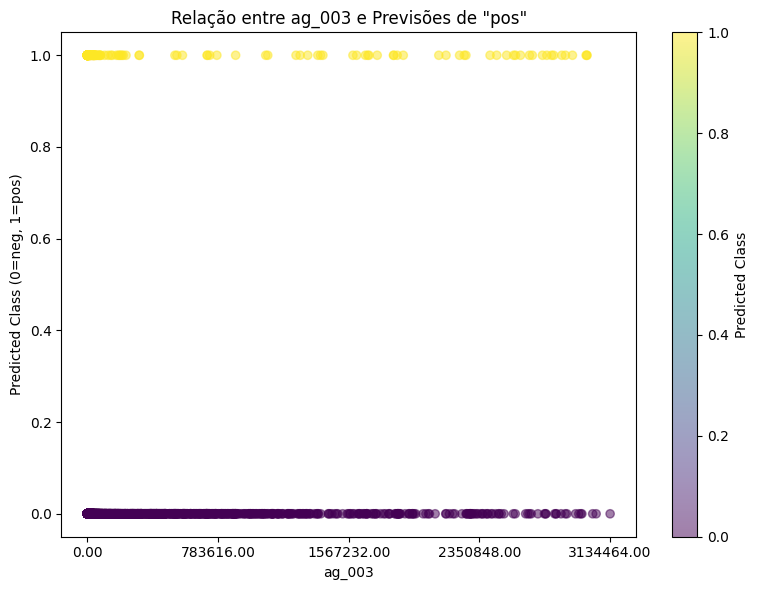

0           5913.60
1           7224.96
2        3594885.12
3        3387773.76
4          94319.04
            ...    
15995    4457943.36
15996       3330.24
15997    4694372.16
15998      10367.04
15999       1276.80
Name: values, Length: 16000, dtype: float64
             values  prediction
42     1.337666e+08           1
287    3.617819e+07           0
345    4.911796e+07           0
366    3.666820e+07           0
372    4.492796e+07           0
...             ...         ...
15799  4.320689e+07           1
15880  7.924361e+07           0
15886  4.986315e+07           0
15955  6.985926e+07           1
15977  5.240369e+07           0

[417 rows x 2 columns]
[42, 287, 345, 366, 372, 416, 426, 434, 443, 465, 486, 487, 499, 612, 697, 730, 786, 798, 833, 853, 890, 908, 928, 950, 970, 1036, 1128, 1133, 1161, 1227, 1257, 1277, 1292, 1338, 1393, 1400, 1403, 1429, 1488, 1517, 1537, 1548, 1577, 1582, 1592, 1613, 1704, 1774, 1784, 1829, 1888, 1944, 1972, 1982, 2027, 2101, 2102, 2147, 2151,

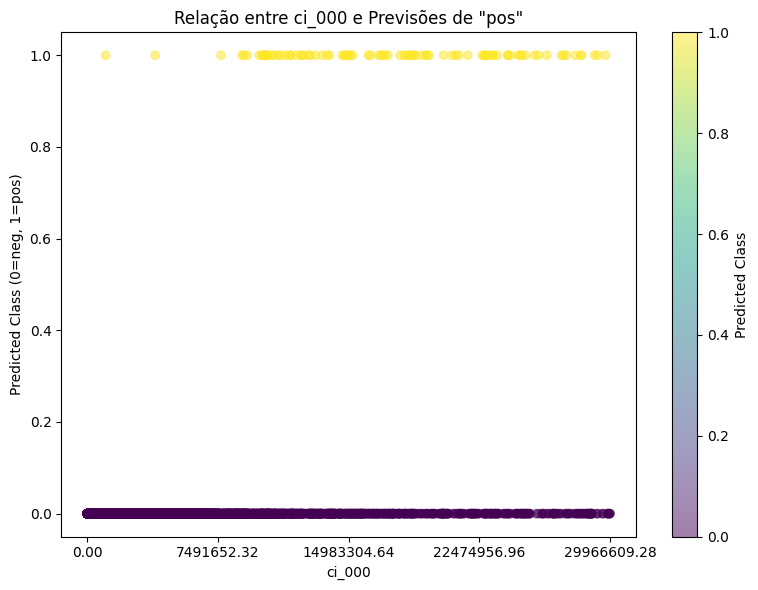

0         1520.0
1            0.0
2        77898.0
3         1116.0
4            0.0
          ...   
15995        0.0
15996     1150.0
15997        0.0
15998        0.0
15999        0.0
Name: values, Length: 16000, dtype: float64
           values  prediction
443     7139288.0           1
486     4679268.0           1
728     2251938.0           1
798    13619224.0           1
890     5181344.0           1
...           ...         ...
14499   4262312.0           1
14594   2991682.0           1
15298   2308124.0           1
15416  10206084.0           1
15783   2770720.0           1

[135 rows x 2 columns]
[443, 486, 728, 798, 890, 1161, 1468, 1488, 1566, 1577, 1613, 1796, 1881, 2174, 2284, 2528, 2531, 2774, 2778, 2800, 2843, 2930, 2946, 3248, 3264, 3294, 3309, 3497, 3513, 3534, 3547, 3581, 3742, 3762, 3846, 3988, 3995, 4405, 4466, 4654, 4682, 4694, 4935, 5069, 5101, 5172, 5286, 5381, 5417, 5448, 5491, 5588, 5886, 5977, 6010, 6130, 6134, 6139, 6177, 6258, 6319, 6457, 6511, 6738, 6813,

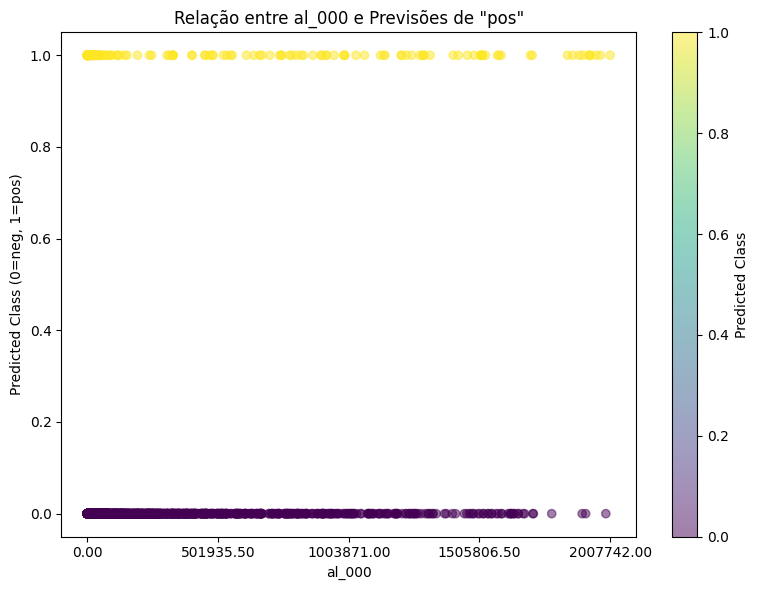

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15995    0.0
15996    0.0
15997    0.0
15998    0.0
15999    0.0
Name: values, Length: 16000, dtype: float64
           values  prediction
468      915050.0           0
728      418512.0           1
1161     904152.0           1
1973     559382.0           1
2528    1574814.0           1
2721     352856.0           1
3309     466340.0           1
3336     713602.0           1
3846    1248664.0           1
4384     388056.0           1
5069     486898.0           1
5212     597478.0           1
5886     598472.0           1
7223     743486.0           1
7252     598472.0           1
8166    1522336.0           1
8750   12567090.0           1
9196    1004462.0           1
9322     695988.0           1
9581     886184.0           1
9594     379514.0           1
9621     515288.0           1
9648    1284232.0           1
9940     469902.0           1
10316    966036.0           1
10681   2506332.0           1
108

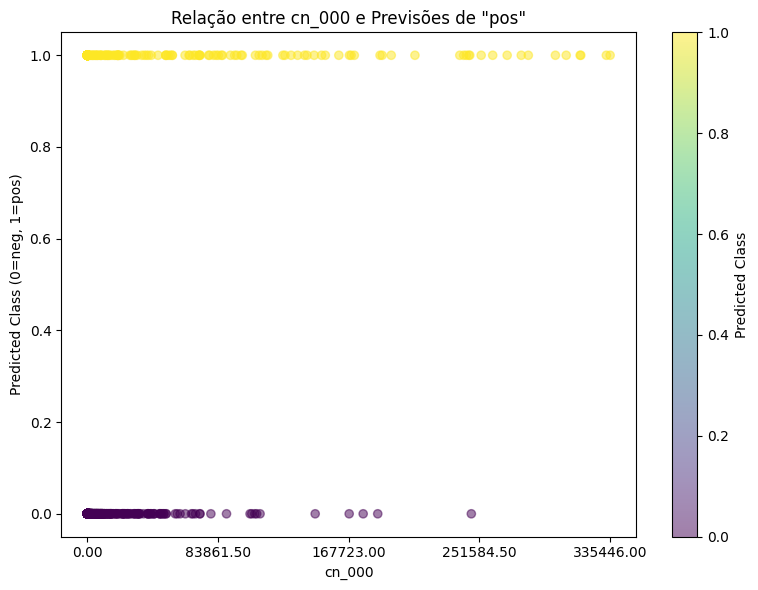

0           60.0
1           82.0
2        66002.0
3        59816.0
4         1814.0
          ...   
15995    81852.0
15996       18.0
15997    79636.0
15998      110.0
15999        8.0
Name: values, Length: 16000, dtype: float64
           values  prediction
42      1800546.0           1
443     1823264.0           1
1577   42949672.0           1
2473    1833224.0           1
3309   42949672.0           1
4088    1801546.0           1
5069    1851934.0           1
9322    1855974.0           1
10057   2255630.0           1
10759   1665858.0           1
13270   1743080.0           1
13897   1660050.0           1
[42, 443, 1577, 2473, 3309, 4088, 5069, 9322, 10057, 10759, 13270, 13897]


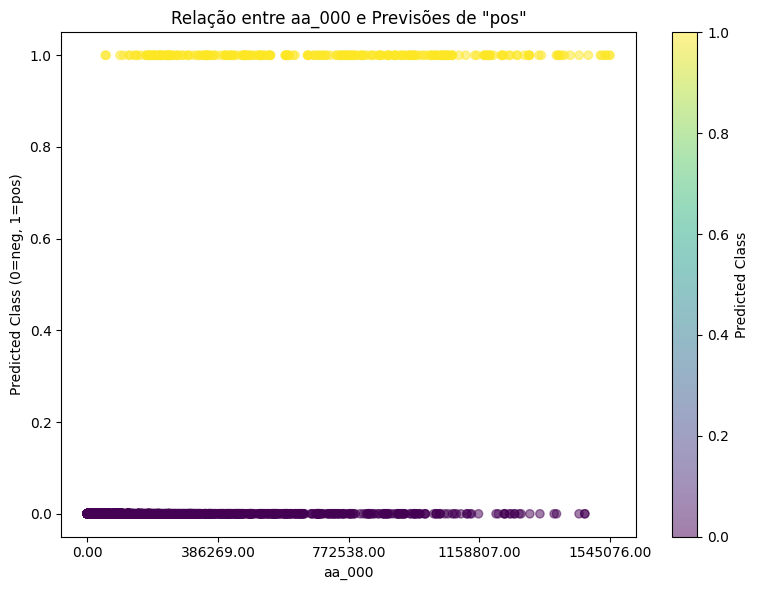

0         124340.0
1          46894.0
2        4644422.0
3        4201350.0
4         110094.0
           ...    
15995    5522314.0
15996      23062.0
15997    5802262.0
15998      87120.0
15999      17070.0
Name: values, Length: 16000, dtype: float64
            values  prediction
42     234981844.0           1
287     45910132.0           0
345     55477046.0           0
372     40741264.0           0
416     59582894.0           0
...            ...         ...
15799   49337574.0           1
15880  114928062.0           0
15886   69935854.0           0
15955   81120624.0           1
15977   62134042.0           0

[404 rows x 2 columns]
[42, 287, 345, 372, 416, 426, 434, 443, 465, 486, 487, 499, 612, 697, 786, 798, 833, 853, 890, 908, 928, 950, 970, 1036, 1128, 1133, 1161, 1227, 1257, 1277, 1292, 1304, 1338, 1393, 1403, 1429, 1488, 1517, 1537, 1548, 1566, 1577, 1582, 1592, 1613, 1691, 1704, 1774, 1784, 1829, 1888, 1944, 1982, 2027, 2102, 2151, 2174, 2188, 2284, 2310, 2341, 2473, 25

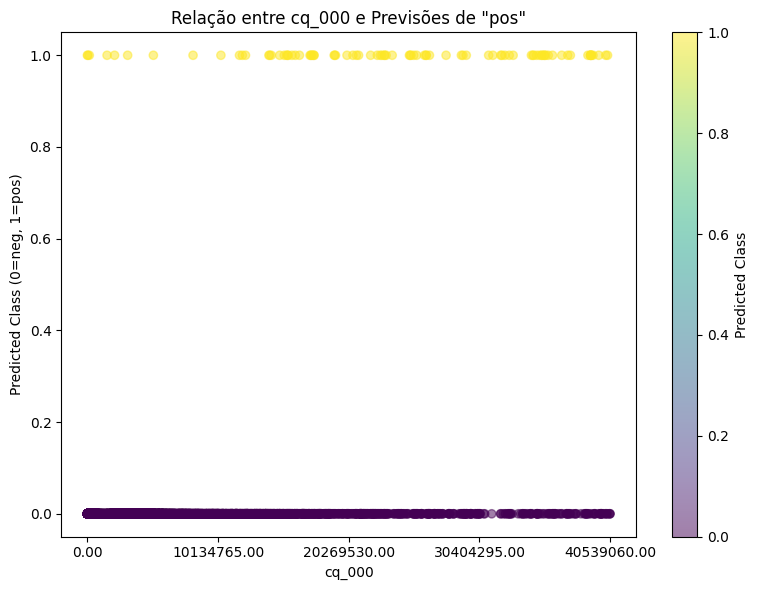

0         124340.0
1          46894.0
2        4644422.0
3        4201350.0
4         110094.0
           ...    
15995    5522314.0
15996      23062.0
15997    5802262.0
15998      87120.0
15999      17070.0
Name: values, Length: 16000, dtype: float64
            values  prediction
42     234981844.0           1
287     45910132.0           0
345     55477046.0           0
372     40741264.0           0
416     59582894.0           0
...            ...         ...
15799   49337574.0           1
15880  114928062.0           0
15886   69935854.0           0
15955   81120624.0           1
15977   62134042.0           0

[404 rows x 2 columns]
[42, 287, 345, 372, 416, 426, 434, 443, 465, 486, 487, 499, 612, 697, 786, 798, 833, 853, 890, 908, 928, 950, 970, 1036, 1128, 1133, 1161, 1227, 1257, 1277, 1292, 1304, 1338, 1393, 1403, 1429, 1488, 1517, 1537, 1548, 1566, 1577, 1582, 1592, 1613, 1691, 1704, 1774, 1784, 1829, 1888, 1944, 1982, 2027, 2102, 2151, 2174, 2188, 2284, 2310, 2341, 2473, 25

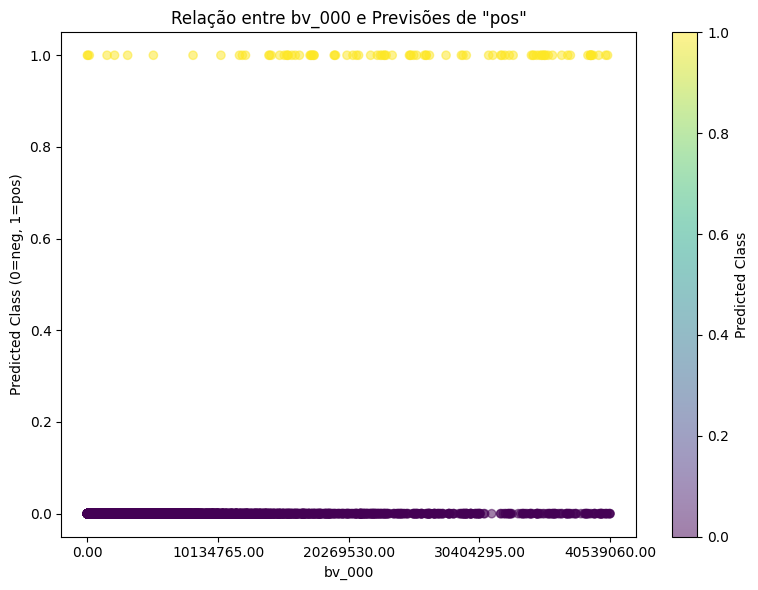

0          340.0
1          352.0
2        25278.0
3        27740.0
4          538.0
          ...   
15995    40386.0
15996      264.0
15997    40850.0
15998      602.0
15999      112.0
Name: values, Length: 16000, dtype: float64
          values  prediction
42     1948124.0           1
345     483266.0           0
366     461294.0           0
416     505298.0           0
426     426200.0           0
...          ...         ...
15799   396180.0           1
15880  1170294.0           0
15886   560188.0           0
15955   739480.0           1
15977   371332.0           0

[346 rows x 2 columns]
[42, 345, 366, 416, 426, 434, 443, 465, 486, 487, 612, 696, 697, 745, 798, 833, 853, 890, 908, 928, 950, 958, 970, 1036, 1128, 1133, 1161, 1227, 1277, 1338, 1393, 1429, 1517, 1537, 1548, 1566, 1577, 1582, 1592, 1613, 1691, 1774, 1829, 1888, 1944, 1982, 1995, 2027, 2101, 2102, 2151, 2174, 2188, 2284, 2341, 2473, 2530, 2531, 2773, 2774, 2778, 2800, 2843, 2936, 2942, 2946, 3193, 3217, 3227, 3248, 

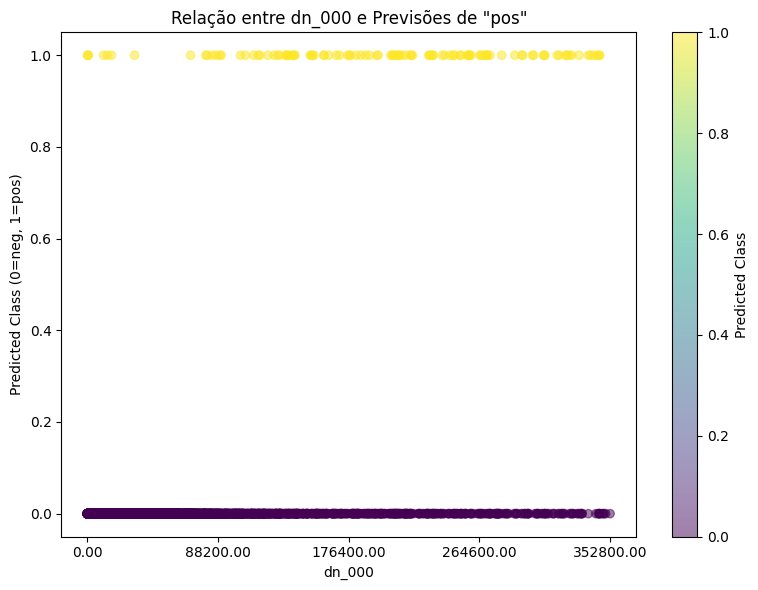

0           59.53
1           81.89
2        66002.89
3        59816.46
4         1813.74
           ...   
15995    81851.77
15996       18.41
15997    79635.97
15998      109.52
15999        7.77
Name: values, Length: 16000, dtype: float64
            values  prediction
42      1800545.06           1
443     1823263.14           1
1577   42949672.95           1
2473    1833223.77           1
3309   42949672.95           1
4088    1801545.63           1
5069    1851933.79           1
9322    1855973.50           1
10057   2255630.40           1
10759   1665858.72           1
13270   1743079.04           1
13897   1660050.64           1
[42, 443, 1577, 2473, 3309, 4088, 5069, 9322, 10057, 10759, 13270, 13897]


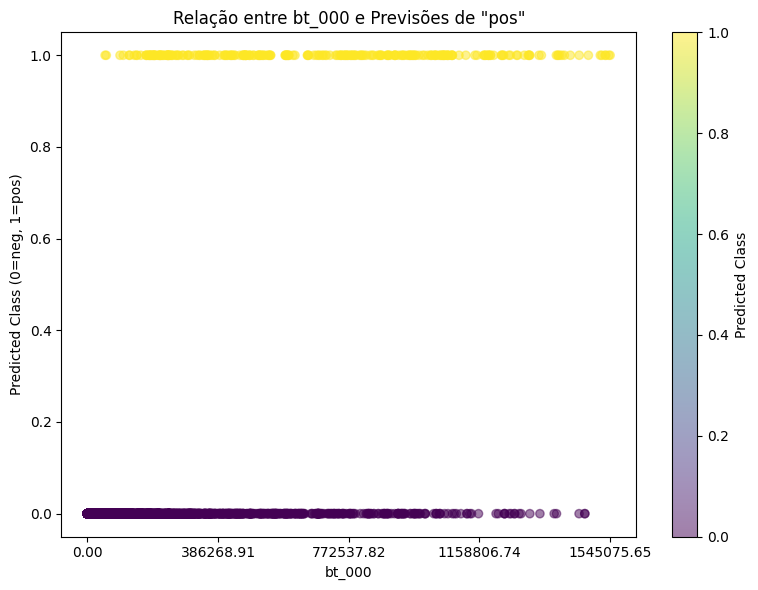

0           2.0
1           0.0
2        5154.0
3           0.0
4           0.0
          ...  
15995       0.0
15996       0.0
15997       0.0
15998       0.0
15999       0.0
Name: values, Length: 16000, dtype: float64
           values  prediction
443     1728676.0           1
798     3523748.0           1
834     2968016.0           1
883     1814646.0           0
890     3802772.0           1
...           ...         ...
14204   1969910.0           1
14425   1763560.0           1
15298   2980468.0           1
15416  10358926.0           1
15420   1619112.0           1

[97 rows x 2 columns]
[443, 798, 834, 883, 890, 1161, 1227, 1277, 1488, 1566, 1613, 1851, 1881, 1973, 2071, 2284, 2310, 2528, 2531, 2774, 2778, 2800, 3309, 3336, 3547, 3649, 3685, 3762, 3846, 3988, 4009, 4108, 4405, 5069, 5158, 5172, 5417, 5448, 5633, 5886, 5977, 6258, 6511, 6813, 7223, 7252, 7498, 7655, 7952, 8166, 8750, 9196, 9275, 9322, 9372, 9396, 9441, 9581, 9594, 9621, 9795, 9868, 9940, 10057, 10316, 10334, 10

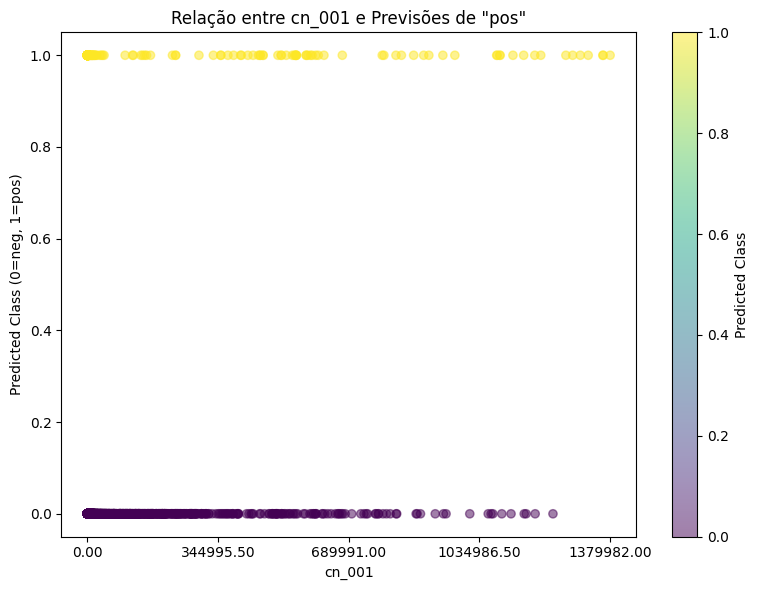

0         124340.0
1          46894.0
2        4644422.0
3        4201350.0
4         110094.0
           ...    
15995    5522314.0
15996      23062.0
15997    5802262.0
15998      87120.0
15999      17070.0
Name: values, Length: 16000, dtype: float64
            values  prediction
42     234981844.0           1
287     45910132.0           0
345     55477046.0           0
372     40741264.0           0
416     59582894.0           0
...            ...         ...
15799   49337574.0           1
15880  114928062.0           0
15886   69935854.0           0
15955   81120624.0           1
15977   62134042.0           0

[403 rows x 2 columns]
[42, 287, 345, 372, 416, 426, 434, 443, 465, 486, 487, 499, 612, 697, 786, 798, 833, 853, 890, 908, 928, 950, 970, 1036, 1128, 1133, 1161, 1227, 1257, 1277, 1292, 1304, 1338, 1393, 1403, 1429, 1488, 1517, 1537, 1548, 1566, 1577, 1582, 1592, 1613, 1691, 1704, 1774, 1784, 1829, 1888, 1944, 1982, 2027, 2102, 2151, 2174, 2188, 2284, 2310, 2341, 2473, 25

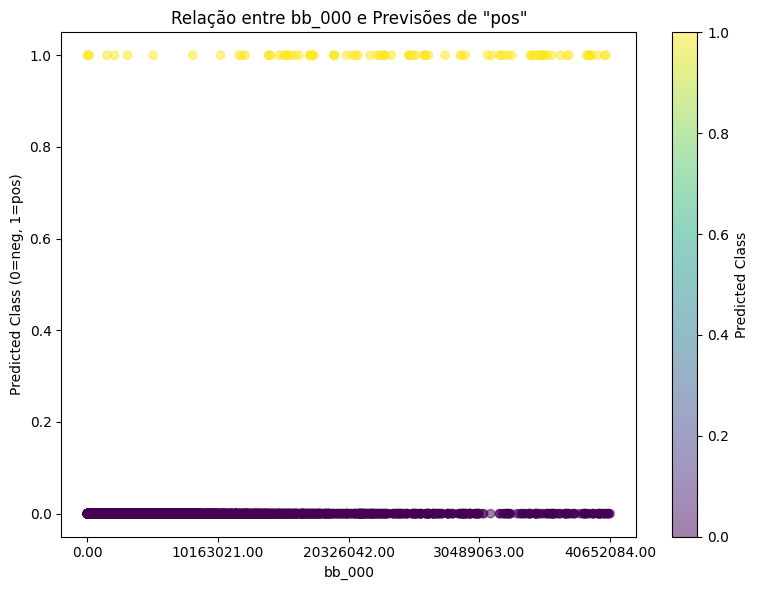

In [ ]:
import numpy as np
from scipy import stats

# Plotting individual graphs for every important column
index_list = top_features.index.values.tolist()
teste = pd.read_csv('teste.csv')
for i in index_list:
    feature_name = top_features.feature[i]
    x_range = 0
    plt.figure(figsize=(8, 6))

    graph_df = pd.DataFrame({'values': teste[feature_name], 'prediction': teste['predicted_class']})
    graph_df.replace({'neg': 0, 'pos': 1}, inplace=True)

    x_data = graph_df['values'].astype(float)
    print(x_data)

    z = np.abs(stats.zscore(x_data.astype(int)))
    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = graph_df[z > threshold]

    # Print the outliers
    print(outliers)

    out_index_list = outliers.index.values.tolist()
    print(out_index_list)

    for o in out_index_list:
      graph_df = graph_df.drop(o)

    x_data = graph_df['values'].astype(float)
    y_data = graph_df['prediction']

    # Defyning limits of x axis based on max and min values

    x_min = float(x_data.min())
    x_max = float(x_data.max())
    x_range = x_max

    # Defyning personalysed labels for the x axis
    x_ticks = np.linspace(x_min, x_max, num=5)
    x_ticks_labels = [f'{tick:.2f}' for tick in x_ticks]

    plt.scatter(x_data, y_data, alpha=0.5, c=y_data, cmap='viridis')
    plt.xticks(x_ticks, x_ticks_labels)
    plt.xlabel(feature_name)
    plt.ylabel('Predicted Class (0=neg, 1=pos)')
    plt.title(f'Relação entre {feature_name} e Previsões de "pos"')
    plt.colorbar(label='Predicted Class')
    plt.tight_layout()
    plt.show()


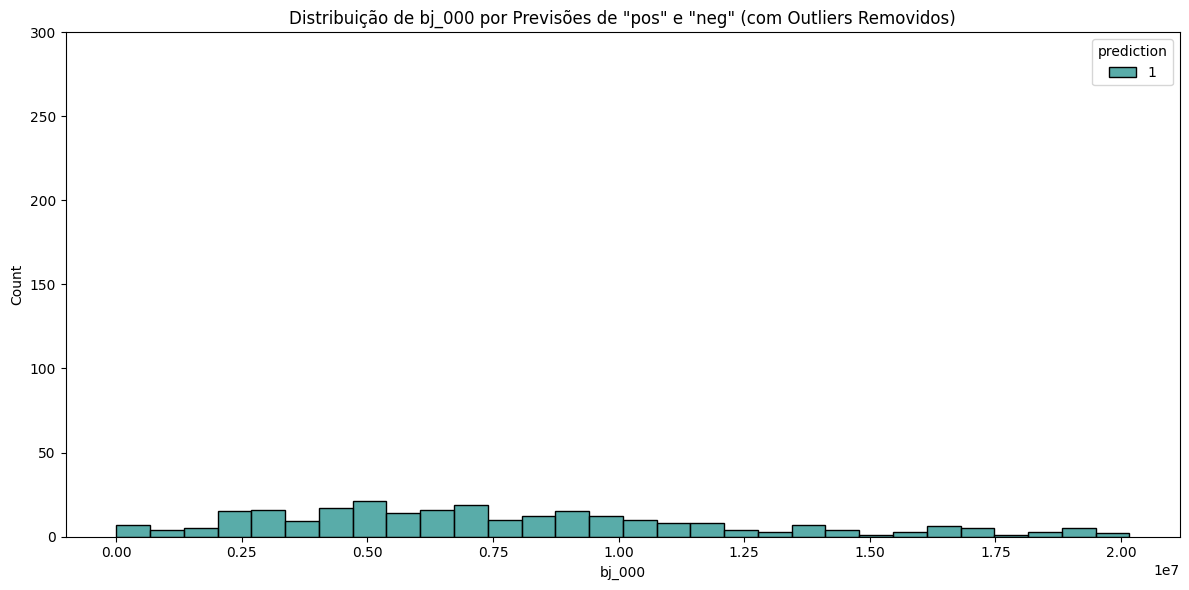

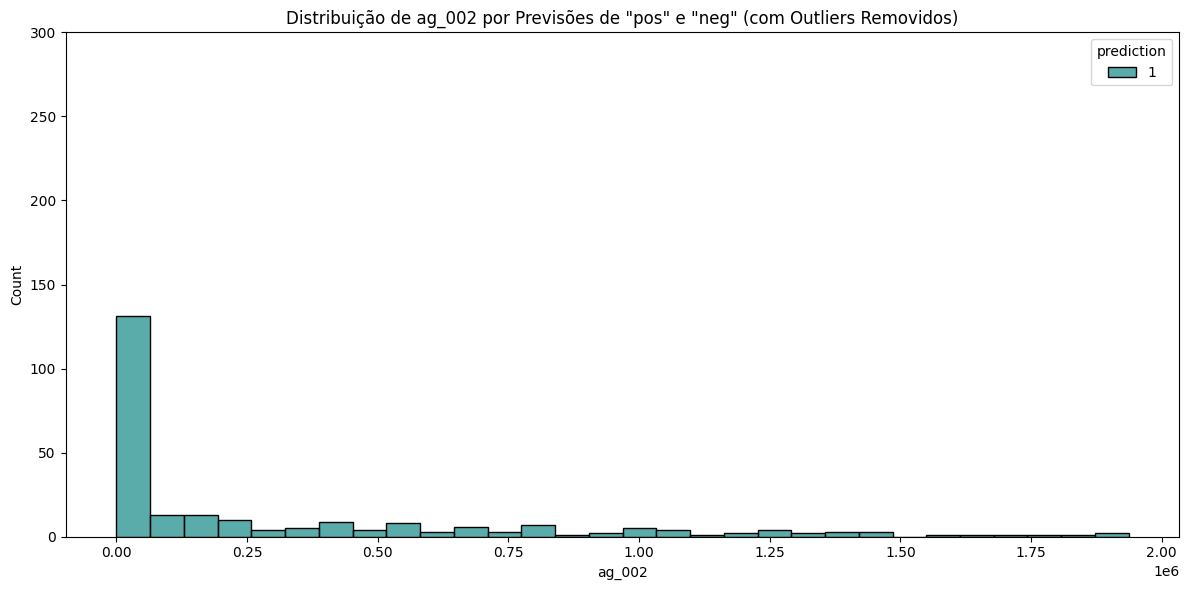

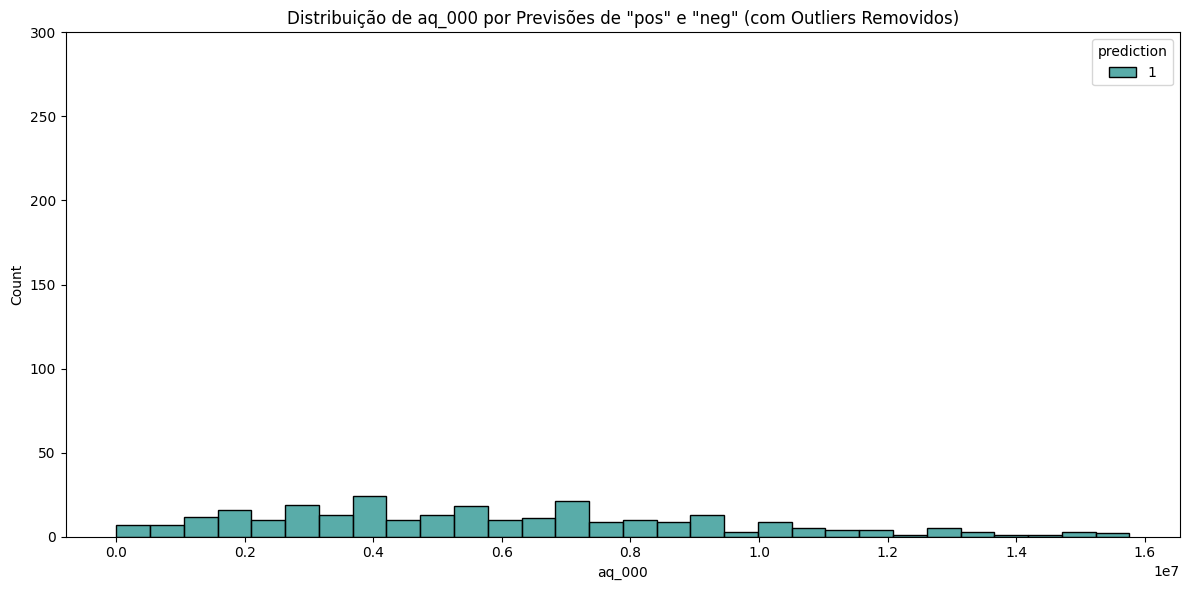

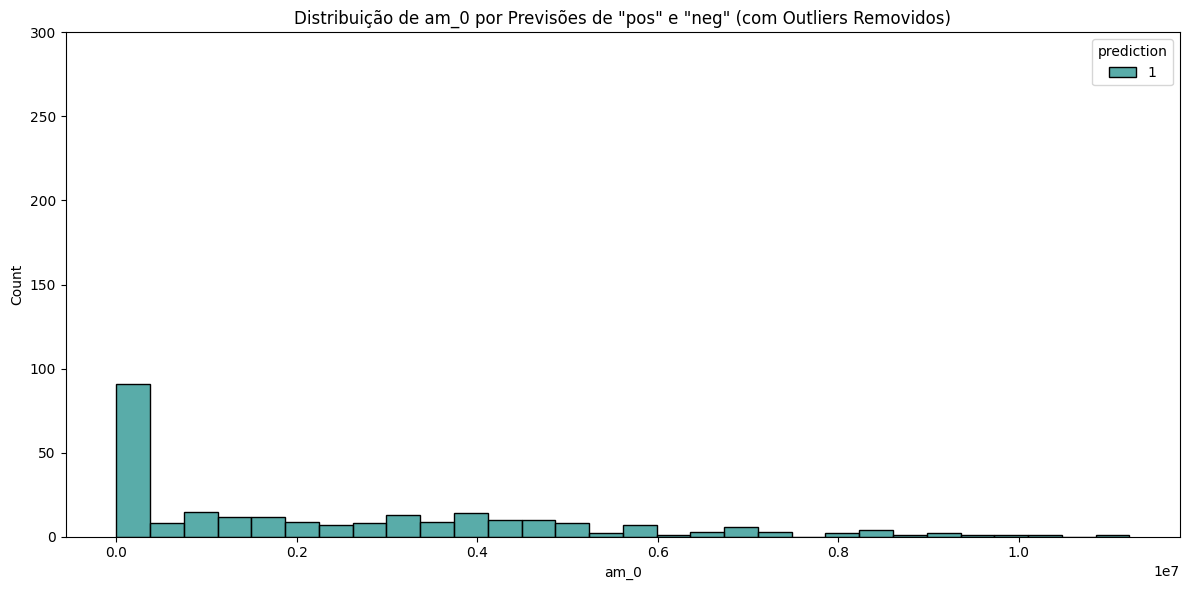

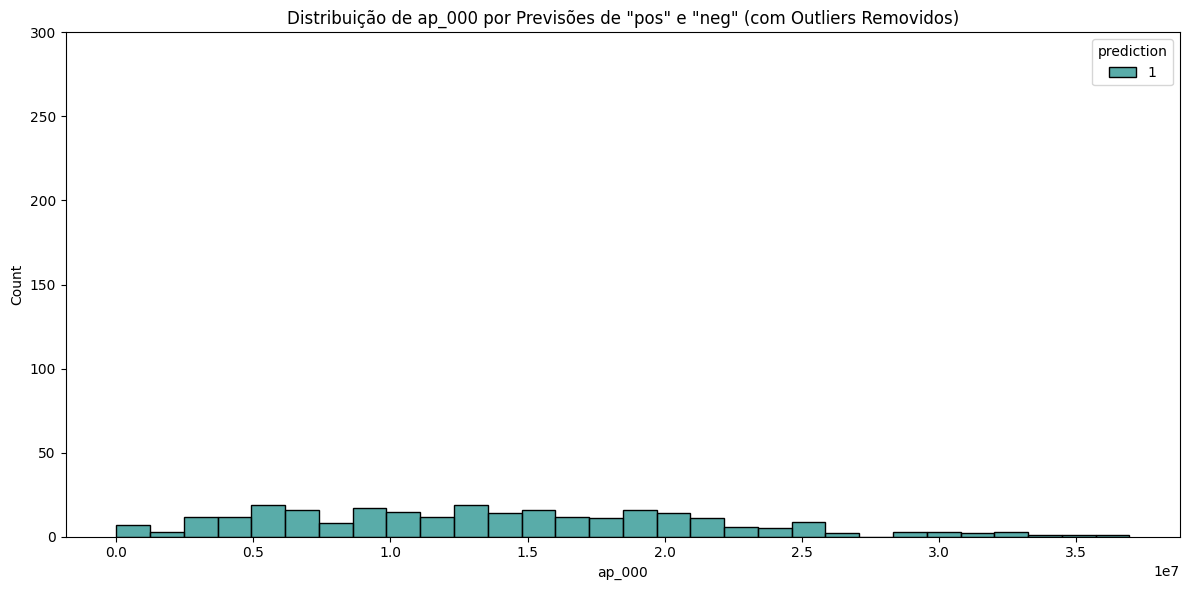

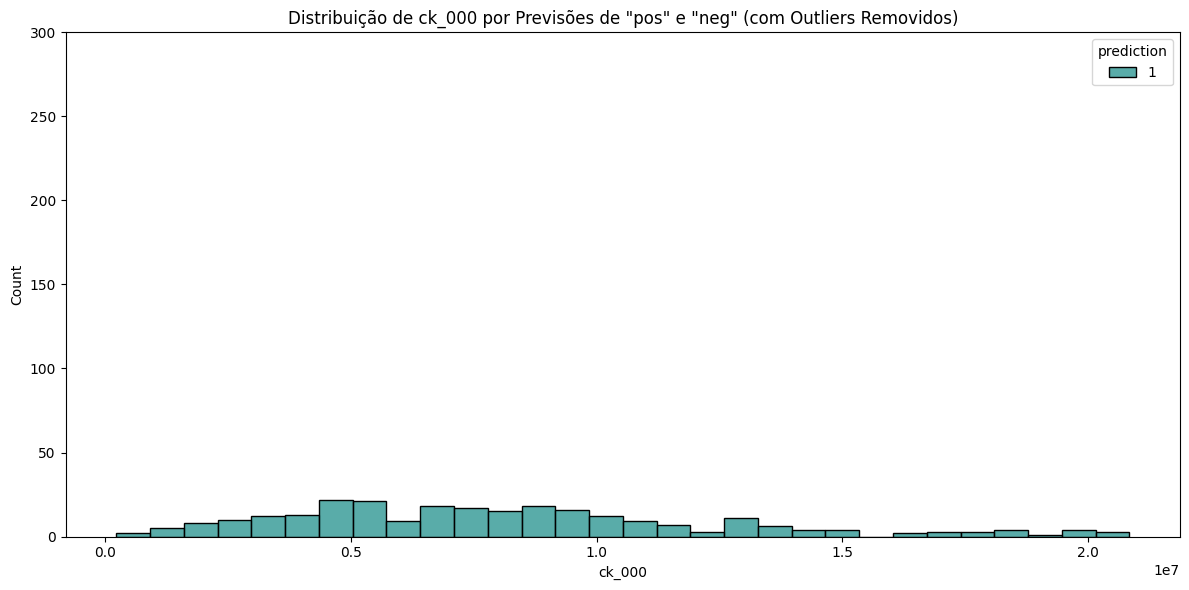

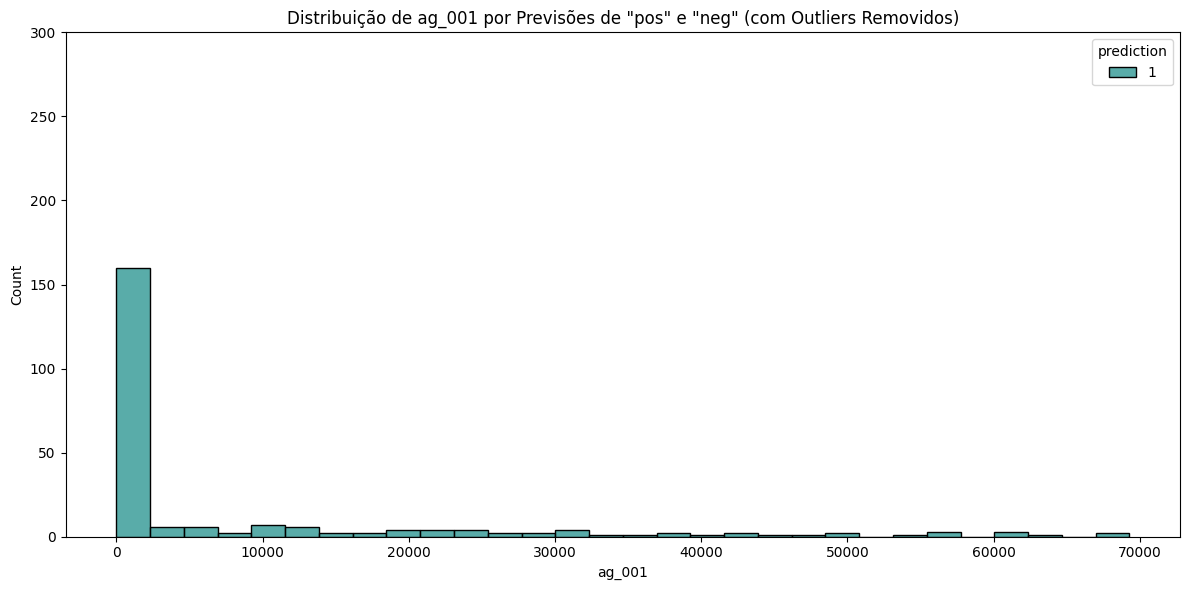

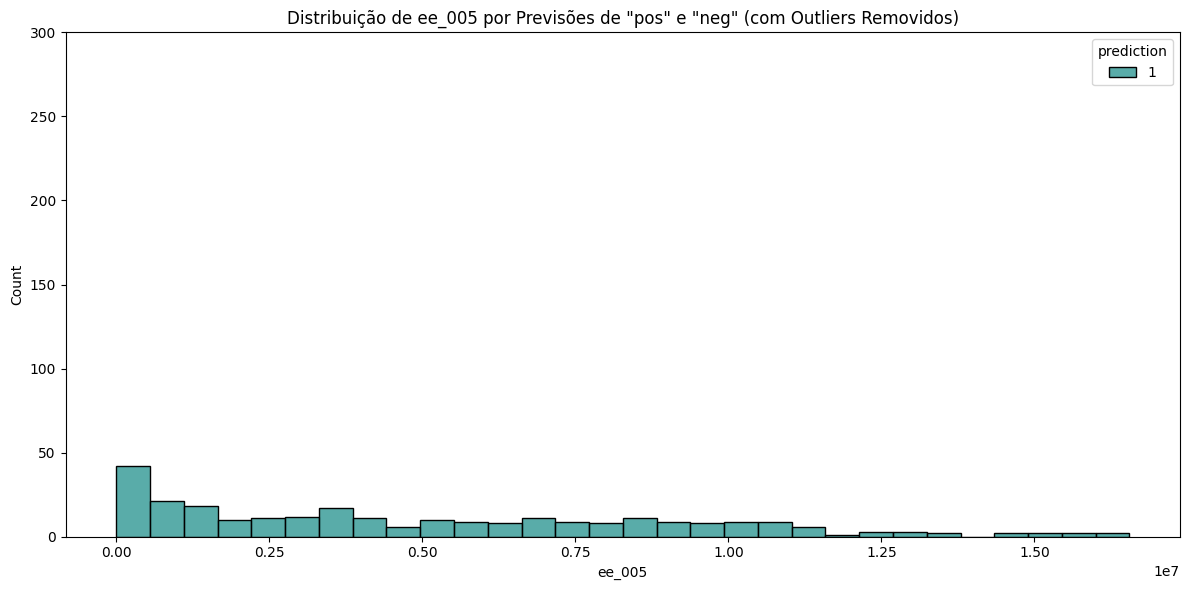

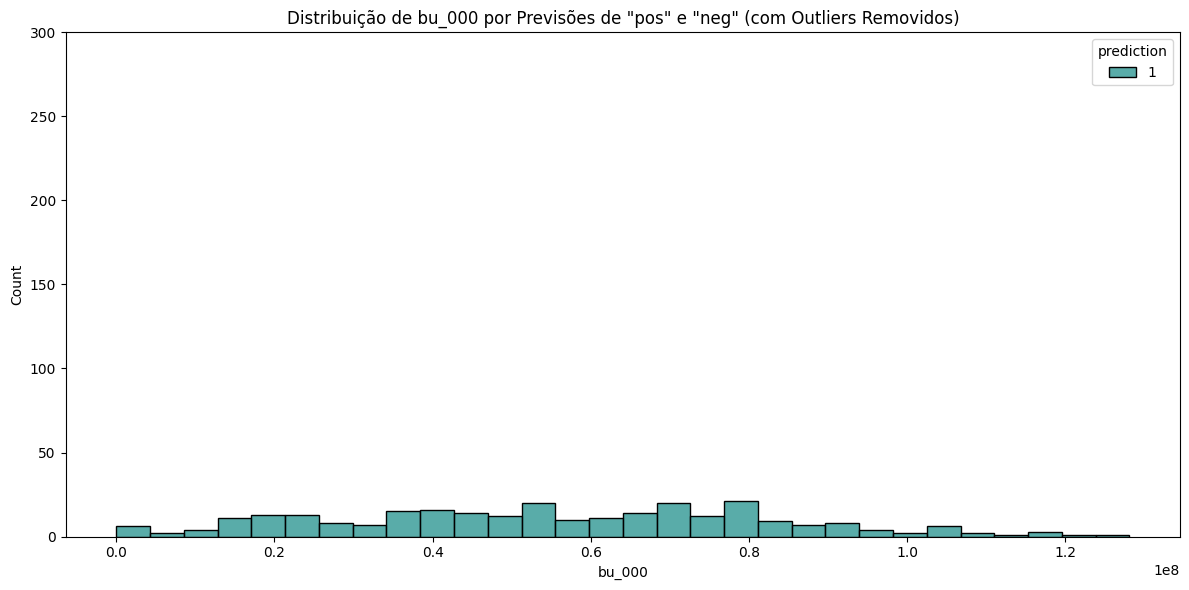

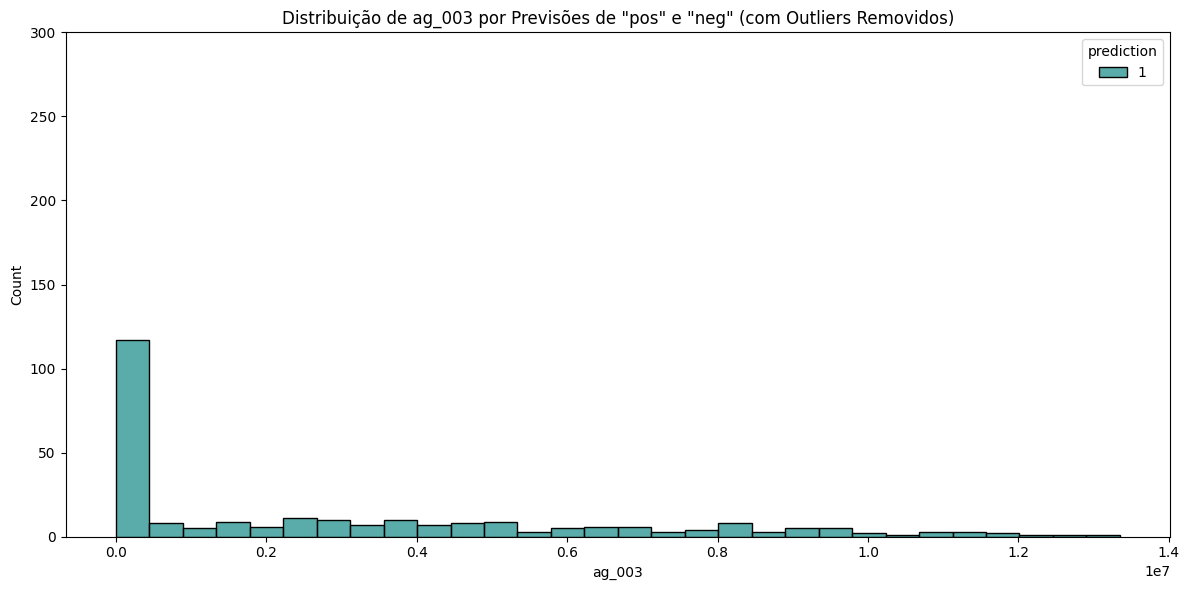

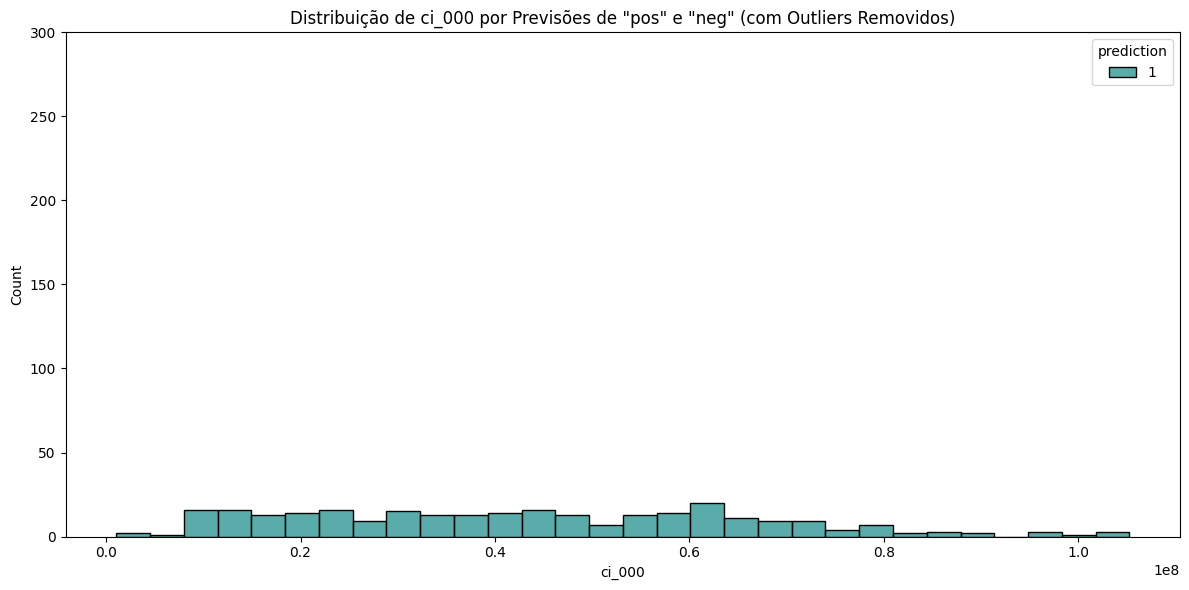

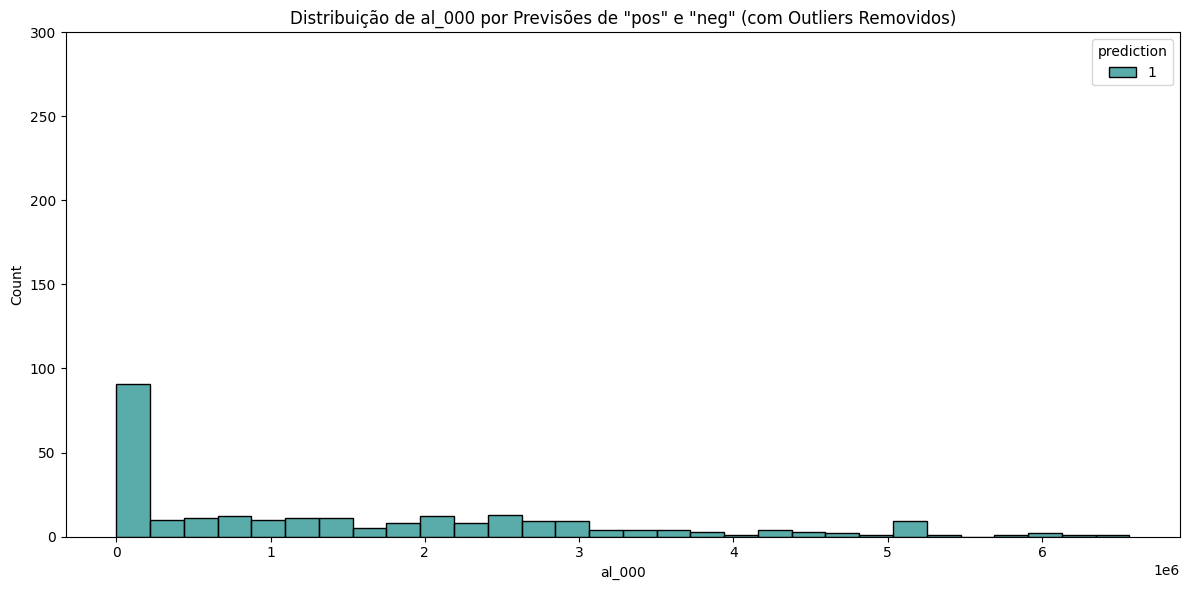

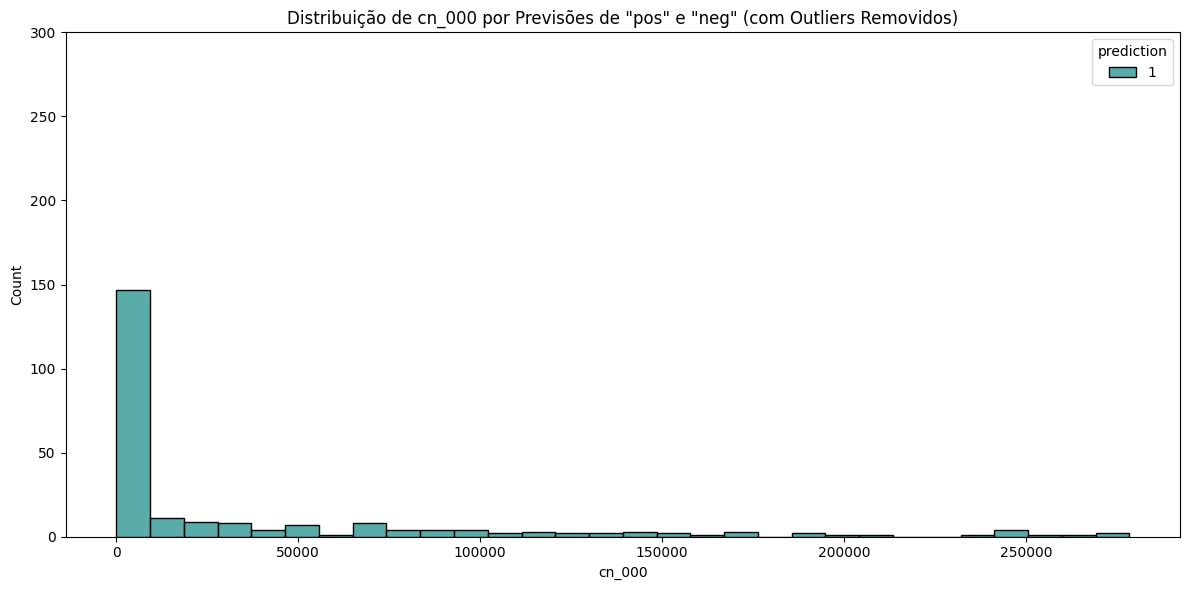

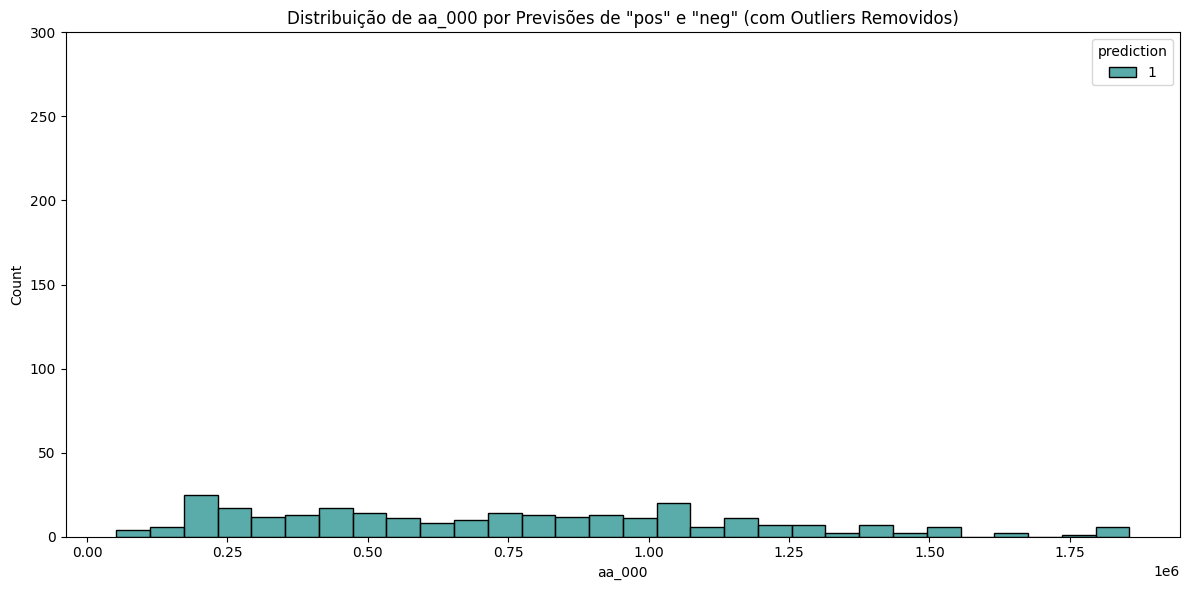

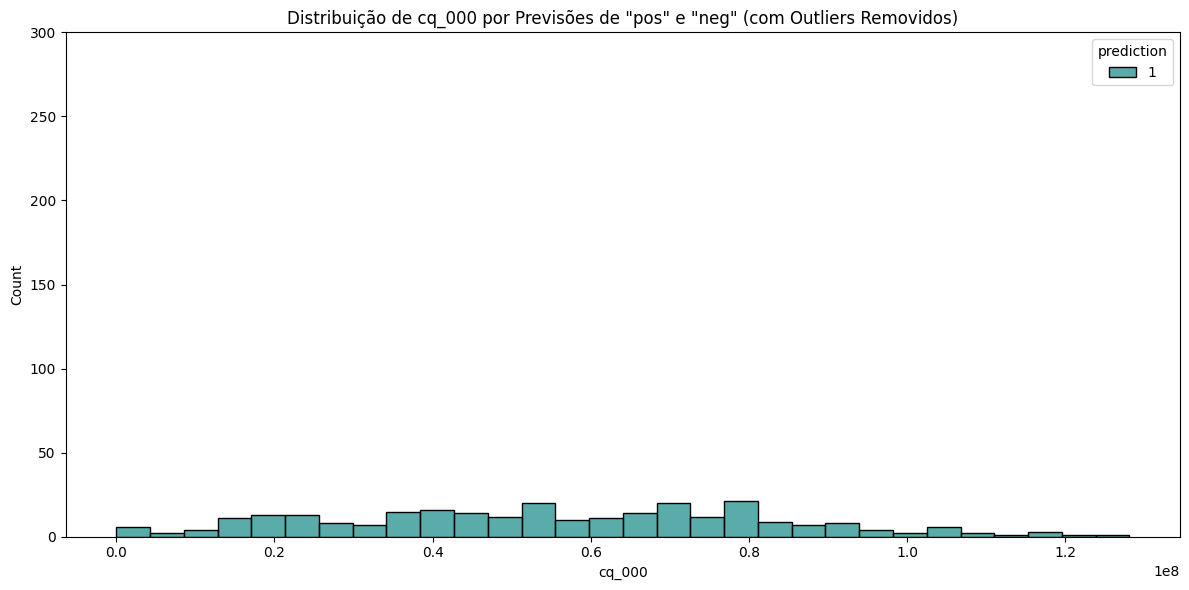

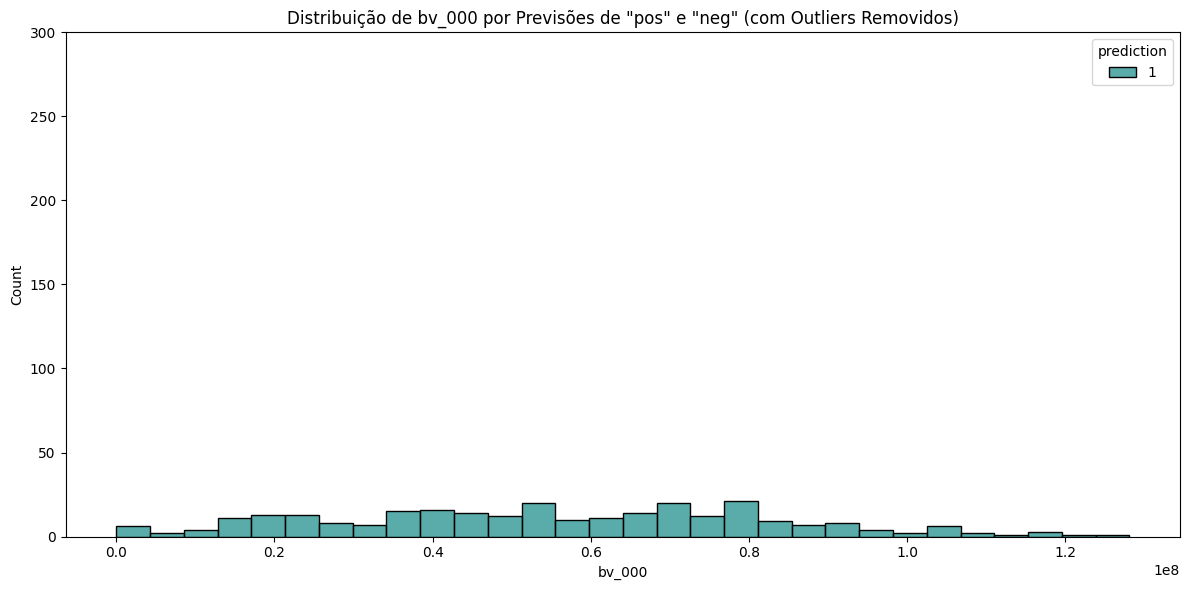

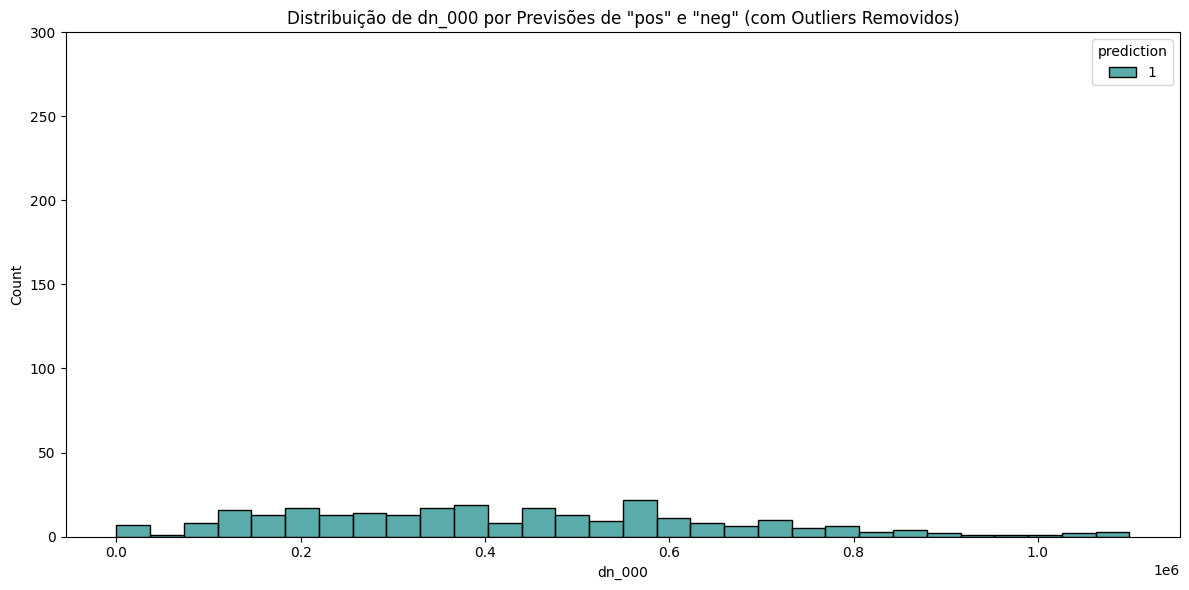

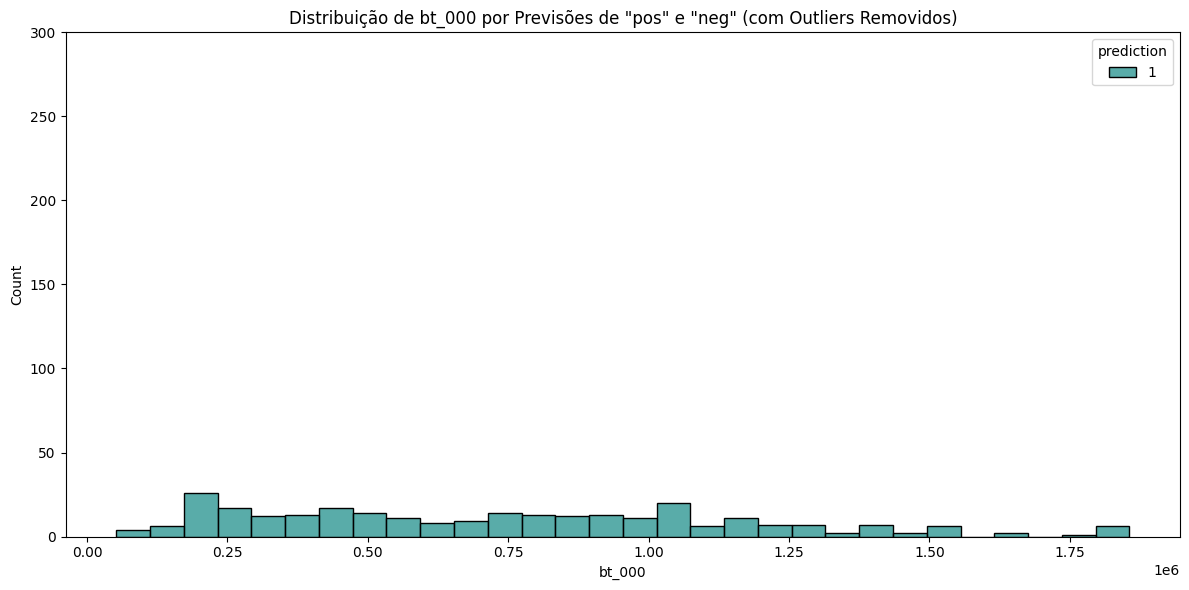

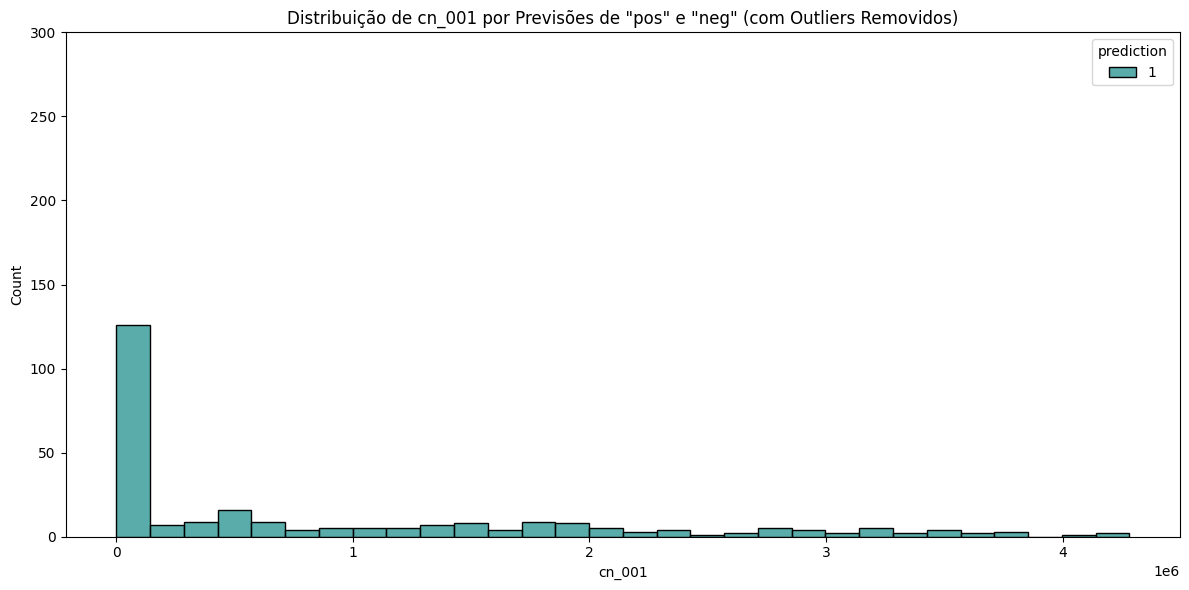

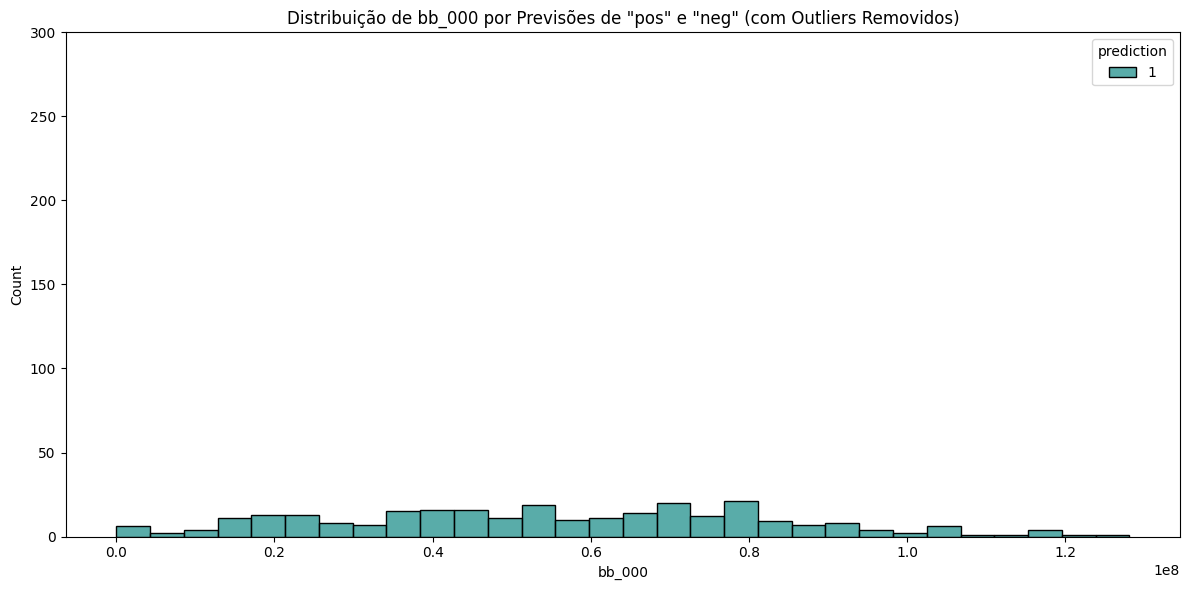

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Selecting most important columns
top_n = 20
top_features = importance_df.head(top_n)
teste = pd.read_csv('teste.csv')

# Plotting bar graphs for each important column displaying the 'pos' counts
for idx, row in top_features.iterrows():
    feature_name = row['feature']
    plt.figure(figsize=(12, 6))

    graph_df = pd.DataFrame({'values': teste[feature_name], 'prediction': teste['predicted_class']})
    graph_df.replace({'neg': 0, 'pos': 1}, inplace=True)
    graph_df = graph_df.loc[graph_df['prediction'] != 0]
    graph_df = remove_outliers(graph_df, 'values')

    sns.histplot(data=graph_df, x='values', hue='prediction', multiple='stack', bins=30, palette='viridis')

    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.title(f'Distribuição de {feature_name} por Previsões de "pos" e "neg" (com Outliers Removidos)')
    plt.ylim(0, 300)
    plt.tight_layout()
    plt.show()
